# Assignment1
We choose Part A. It looks like an interesting question to answer! Let us first explore the data.

In [30]:
import pandas as pd
from more_itertools.more import split_when

data_2019 = pd.read_csv('data/2019-2020 NBA Play-By-Play Data.csv')
data_2019.head()
data = data_2019

This is a lot of data! Let's dig down more

In [31]:
#List of teams
def away_team(x):
    import re
    words_pattern = '[A-Z]+'
    words = re.search(words_pattern, x)
    return words[0]


def home_team(x):
    import re
    words_pattern = '@[A-Z]+'
    words = re.search(words_pattern, x)
    return words[0].replace('@', '')


data['home_team'] = data['GameFile'].apply(lambda x: home_team(x))
data['away_team'] = data['GameFile'].apply(lambda x: away_team(x))
data.head()

,Unnamed: 0,game_id,data_set,date,a1,a2,a3,a4,a5,h1,...,type,shot_distance,original_x,original_y,converted_x,converted_y,description,GameFile,home_team,away_team
0,0,"=""0021900132""",2019-2020 Regular Season,2019-11-10,Will Barton,Paul Millsap,Nikola Jokic,Gary Harris,Jamal Murray,Treveon Graham,...,start of period,NaN,NaN,NaN,NaN,NaN,NaN,[2019-11-10]-0021900132-DEN@MIN.csv,MIN,DEN
1,1,"=""0021900132""",2019-2020 Regular Season,2019-11-10,Will Barton,Paul Millsap,Nikola Jokic,Gary Harris,Jamal Murray,Treveon Graham,...,jump ball,NaN,NaN,NaN,NaN,NaN,Jump Ball Towns vs. Jokic: Tip to Covington,[2019-11-10]-0021900132-DEN@MIN.csv,MIN,DEN
2,2,"=""0021900132""",2019-2020 Regular Season,2019-11-10,Will Barton,Paul Millsap,Nikola Jokic,Gary Harris,Jamal Murray,Treveon Graham,...,unknown,1.0,-8.0,9.0,24.2,88.1,Wiggins 1' Cutting Dunk Shot (2 PTS) (Towns 1 ...,[2019-11-10]-0021900132-DEN@MIN.csv,MIN,DEN
3,3,"=""0021900132""",2019-2020 Regular Season,2019-11-10,Will Barton,Paul Millsap,Nikola Jokic,Gary Harris,Jamal Murray,Treveon Graham,...,unknown,6.0,60.0,21.0,19.0,7.1,Jokic 6' Driving Floating Bank Jump Shot (2 PT...,[2019-11-10]-0021900132-DEN@MIN.csv,MIN,DEN
4,4,"=""0021900132""",2019-2020 Regular Season,2019-11-10,Will Barton,Paul Millsap,Nikola Jokic,Gary Harris,Jamal Murray,Treveon Graham,...,Jump Shot,25.0,-173.0,177.0,7.7,71.3,MISS Graham 25' 3PT Jump Shot,[2019-11-10]-0021900132-DEN@MIN.csv,MIN,DEN


Lets find out about star partnerships now

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7828\3030705421.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player2_games['differential'] = player2_games.apply(lambda x: x['home_score'] - x['away_score'], axis=1)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_7828\3030705421.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  both_games['differential'] = both_games.apply(lambda x: x['home_score'] - x['away_score'], axis=1)


[5.928571428571429, 4.044934172867773, 1.8989074180563543, 7.0]


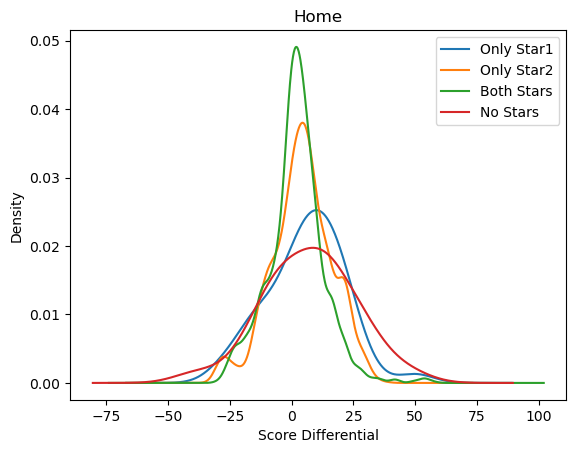

In [79]:
from matplotlib import pyplot as plt

player1 = 'James Harden'
player2 = 'Russell Westbrook'
team = 'HOU'

data['home_team_players'] = data.apply(lambda x: '%s_%s_%s_%s_%s' % (x['h1'], x['h2'], x['h3'], x['h4'], x['h5']),
                                       axis=1)
data['away_team_players'] = data.apply(lambda x: '%s_%s_%s_%s_%s' % (x['a1'], x['a2'], x['a3'], x['a4'], x['a5']),
                                       axis=1)

# team = data[data['home_team'] == team]
# team.head(50)
player1_games = data[(data['home_team'] == team)
                     & (data['home_team_players'].str.contains(player1) == True)
                     & (data['home_team_players'].str.contains(player2) == False)]


player2_games = data[(data['home_team'] == team)
                     & (data['home_team_players'].str.contains(player1) == False)
                     & (data['home_team_players'].str.contains(player2) == True)]
both_games = data[(data['home_team'] == team)
                  & (data['home_team_players'].str.contains(player1) == True)
                  & (data['home_team_players'].str.contains(player2) == True)]
none_games = data[(data['home_team'] == team)
                  & (data['home_team_players'].str.contains(player1) == False)
                  & (data['home_team_players'].str.contains(player2) == False)]

player1_games = player1_games.groupby('game_id').agg({'home_score': 'max', 'away_score': 'max'})
player1_games['differential'] = player1_games.apply(lambda x: x['home_score'] - x['away_score'], axis=1)
p1 = player1_games['differential'].plot(kind='kde', label='Only Star1')
p1.legend().set_visible(True)

player2_games.groupby('game_id').agg({'home_score': 'max', 'away_score': 'max'})
player2_games['differential'] = player2_games.apply(lambda x: x['home_score'] - x['away_score'], axis=1)
p2 = player2_games['differential'].plot(kind='kde', label='Only Star2')
p2.legend().set_visible(True)

both_games.groupby('game_id').agg({'home_score': 'max', 'away_score': 'max'})
both_games['differential'] = both_games.apply(lambda x: x['home_score'] - x['away_score'], axis=1)
p3 = both_games['differential'].plot(kind='kde', label='Both Stars')
p3.legend().set_visible(True)

none_games = none_games.groupby('game_id').agg({'home_score': 'max', 'away_score': 'max'})
none_games['differential'] = none_games.apply(lambda x: x['home_score'] - x['away_score'], axis=1)
p4 = none_games['differential'].plot(kind='kde', label='No Stars', title='Home')
p4.legend().set_visible(True)
p4.set_xlabel("Score Differential")
insights = [player1_games['differential'].mean(), player2_games['differential'].mean(), both_games['differential'].mean(),
            none_games['differential'].mean()]
print(insights)
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7828\3255105023.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player2_games['differential'] = player2_games.apply(lambda x: x['away_score'] - x['home_score'], axis=1)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_7828\3255105023.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  both_games['differential'] = both_games.apply(lambda x: x['away_score'] - x['home_score'], axis=1)


[-0.2631578947368421, -0.3543103448275862, -0.9035805283626123, -0.20689655172413793]


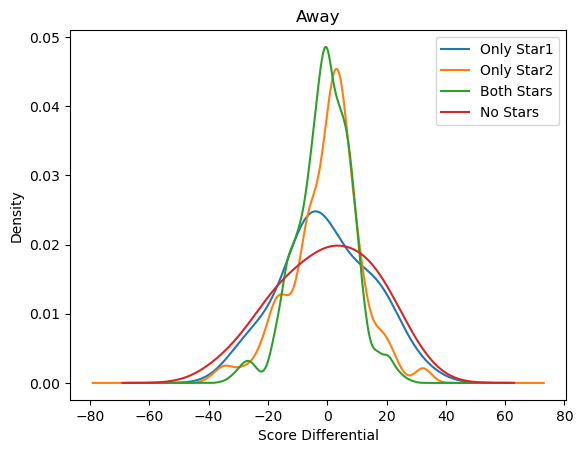

In [80]:
player1_games = data[(data['away_team'] == team)
                     & (data['away_team_players'].str.contains(player1) == True)
                     & (data['away_team_players'].str.contains(player2) == False)]
player2_games = data[(data['away_team'] == team)
                     & (data['away_team_players'].str.contains(player1) == False)
                     & (data['away_team_players'].str.contains(player2) == True)]
both_games = data[(data['away_team'] == team)
                  & (data['away_team_players'].str.contains(player1) == True)
                  & (data['away_team_players'].str.contains(player2) == True)]
none_games = data[(data['away_team'] == team)
                  & (data['away_team_players'].str.contains(player1) == False)
                  & (data['away_team_players'].str.contains(player2) == False)]

player1_games = player1_games.groupby('game_id').agg({'home_score': 'max', 'away_score': 'max'})
player1_games['differential'] = player1_games.apply(lambda x: x['away_score'] - x['home_score'], axis=1)
p1 = player1_games['differential'].plot(kind='kde', label='Only Star1')
p1.legend().set_visible(True)

player2_games.groupby('game_id').agg({'home_score': 'max', 'away_score': 'max'})
player2_games['differential'] = player2_games.apply(lambda x: x['away_score'] - x['home_score'], axis=1)
p2 = player2_games['differential'].plot(kind='kde', label='Only Star2')
p2.legend().set_visible(True)

both_games.groupby('game_id').agg({'home_score': 'max', 'away_score': 'max'})
both_games['differential'] = both_games.apply(lambda x: x['away_score'] - x['home_score'], axis=1)
p3 = both_games['differential'].plot(kind='kde', label='Both Stars')
p3.legend().set_visible(True)

none_games = none_games.groupby('game_id').agg({'home_score': 'max', 'away_score': 'max'})
none_games['differential'] = none_games.apply(lambda x: x['away_score'] - x['home_score'], axis=1)
p4 = none_games['differential'].plot(kind='kde', label='No Stars', title='Away')
p4.legend().set_visible(True)
p4.set_xlabel("Score Differential")
insights = [player1_games['differential'].mean(), player2_games['differential'].mean(),
            both_games['differential'].mean(),
            none_games['differential'].mean()]
print(insights)
plt.show()